In [1]:
import pandas as pd
import requests

In [2]:
standings_url = "https://www.soccerstats.com/latest.asp?league=spain_2024"  #2023-24 season
data = requests.get(standings_url)

In [3]:
data

<Response [200]>

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" http-equiv="Content-Language"/>
  <link href="//www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="//www.google-analytics.com" rel="dns-prefetch"/>
  <link href="//ajax.googleapis.com" rel="dns-prefetch"/>
  <meta content="#ffffff" name="theme-color"/>
  <style>
   html,body {
background:#ffffff;
z-index:0;
/*text-align:center;*/
font-family: Tahoma, Arial, sans-serif;
font-size:12px;
line-height:1.3em;
margin:0;
padding:0;
}
#insidetopdiv {
    z-index: 999;
}






@media screen and (max-width: 1484px) {
    .adcol1 {
        min-width: 160px;
    }	
    .headerlocal {
        left: 320px;
    }


    .sidebar3 {
		float: left;
    }	



}







@media screen and (min-width: 1485px) {
    .adcol1 {
        min-width: 160px;
    }	
    .headerlocal {
        left: 320px;
    }


    .sidebar3 {
		float: left;
    }	
}




#container_old {
widt
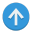
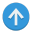
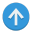

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(data.text)
print(soup.prettify())


In [8]:
standings_table = soup.find_all('btable') #css selector - classtype.name

In [9]:
standings_table

[]

In [14]:
links = standings_table.find_all('a')  #finds all tags with 'a' type

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [ ]:
links = [l.get("href") for l in links]

In [ ]:
links = [l for l in links if "/squads/" in l]

In [ ]:
team_urls = [f"https://fbref.com/{l}" for l in links]

In [ ]:
team_urls

['https://fbref.com//en/squads/b8fd03ef/2023-2024/Manchester-City-Stats',
 'https://fbref.com//en/squads/18bb7c10/2023-2024/Arsenal-Stats',
 'https://fbref.com//en/squads/822bd0ba/2023-2024/Liverpool-Stats',
 'https://fbref.com//en/squads/8602292d/2023-2024/Aston-Villa-Stats',
 'https://fbref.com//en/squads/361ca564/2023-2024/Tottenham-Hotspur-Stats',
 'https://fbref.com//en/squads/cff3d9bb/2023-2024/Chelsea-Stats',
 'https://fbref.com//en/squads/b2b47a98/2023-2024/Newcastle-United-Stats',
 'https://fbref.com//en/squads/19538871/2023-2024/Manchester-United-Stats',
 'https://fbref.com//en/squads/7c21e445/2023-2024/West-Ham-United-Stats',
 'https://fbref.com//en/squads/47c64c55/2023-2024/Crystal-Palace-Stats',
 'https://fbref.com//en/squads/d07537b9/2023-2024/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com//en/squads/4ba7cbea/2023-2024/Bournemouth-Stats',
 'https://fbref.com//en/squads/fd962109/2023-2024/Fulham-Stats',
 'https://fbref.com//en/squads/8cec06e1/2023-2024/Wolverhampton-

In [ ]:
team_url = team_urls[0]

In [ ]:
team_url

'https://fbref.com//en/squads/b8fd03ef/2023-2024/Manchester-City-Stats'

In [ ]:
data = requests.get(team_url)

In [ ]:
matches = pd.read_html(data.text, match = 'Scores & Fixtures' )

In [ ]:
matches[0].head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,NaN,NaN,55,81145.0,Kyle Walker,4-2-3-1,4-3-3,Stuart Attwell,Match Report,NaN
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65,21572.0,Kevin De Bruyne,4-2-3-1,5-4-1,Craig Pawson,Match Report,NaN
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,NaN,NaN,74,NaN,Kyle Walker,4-2-3-1,4-2-3-1,François Letexier,Match Report,NaN
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59,53419.0,Kyle Walker,4-2-3-1,4-3-3,Robert Jones,Match Report,NaN
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79,31336.0,Kyle Walker,4-2-3-1,3-5-2,Jarred Gillett,Match Report,NaN


In [ ]:
soup = BeautifulSoup(data)

In [ ]:
links = soup.find_all('a')

In [ ]:
links = [l.get("href") for l in links]

In [ ]:
links = [l for l in links if l and "/all_comps/shooting/" in l]

In [ ]:
links

['/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions']

In [ ]:
data = requests.get(f"https://fbref.com/{links[0]}").text

In [ ]:
shooting = pd.read_html(data, match  = "Shooting")[0]

In [ ]:
shooting.head()

For Manchester City                                                     \
                 Date   Time              Comp                Round  Day   
0          2023-08-06  16:00  Community Shield  FA Community Shield  Sun   
1          2023-08-11  20:00    Premier League          Matchweek 1  Fri   
2          2023-08-16  22:00         Super Cup       UEFA Super Cup  Wed   
3          2023-08-19  20:00    Premier League          Matchweek 2  Sat   
4          2023-08-27  14:00    Premier League          Matchweek 3  Sun   

                                                ... Standard                \
     Venue Result     GF     GA       Opponent  ...     Dist   FK PK PKatt   
0  Neutral      D  1 (1)  1 (4)        Arsenal  ...      NaN  NaN  0     0   
1     Away      W      3      0        Burnley  ...     13.9  0.0  0     0   
2     Home      D  1 (5)  1 (4)     es Sevilla  ...      NaN  NaN  0     0   
3     Home      W      1      0  Newcastle Utd  ...     17.9  0.0  0     0   
4     Away      W      2      1  Sheffield Utd  ...     17.3  2.0  0     1   

  Expected                           Unnamed: 25_level_0  
        xG npxG npxG/Sh G-xG np:G-xG        Match Report  
0      NaN  NaN     NaN  NaN     NaN        Match Report  
1      1.9  1.9    0.12  1.1     1.1        Match Report  
2      NaN  NaN     NaN  NaN     NaN        Match Report  
3      1.0  1.0    0.07  0.0     0.0        Match Report  
4      3.5  2.8    0.10 -1.5    -0.8        Match Report  

[5 rows x 26 columns]

In [ ]:
shooting.columns = shooting.columns.droplevel()  #dropped multilevel index

In [ ]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,13.9,0.0,0,0,1.9,1.9,0.12,1.1,1.1,Match Report
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,17.9,0.0,0,0,1.0,1.0,0.07,0.0,0.0,Match Report
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,17.3,2.0,0,1,3.5,2.8,0.10,-1.5,-0.8,Match Report


In [ ]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          57 non-null     object 
 1   Time          57 non-null     object 
 2   Comp          57 non-null     object 
 3   Round         57 non-null     object 
 4   Day           57 non-null     object 
 5   Venue         57 non-null     object 
 6   Result        58 non-null     object 
 7   GF            57 non-null     object 
 8   GA            57 non-null     object 
 9   Opponent      57 non-null     object 
 10  Gls           58 non-null     int64  
 11  Sh            58 non-null     int64  
 12  SoT           58 non-null     int64  
 13  SoT%          58 non-null     float64
 14  G/Sh          58 non-null     float64
 15  G/SoT         57 non-null     float64
 16  Dist          49 non-null     float64
 17  FK            49 non-null     float64
 18  PK            58 non-null     in

In [ ]:
team_data = matches[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on = "Date" )

In [ ]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,...,4-3-3,Stuart Attwell,Match Report,NaN,8,4,NaN,NaN,0,0
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,5-4-1,Craig Pawson,Match Report,NaN,17,8,13.9,0.0,0,0
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,...,4-2-3-1,François Letexier,Match Report,NaN,23,7,NaN,NaN,0,0
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,4-3-3,Robert Jones,Match Report,NaN,14,4,17.9,0.0,0,0
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,3-5-2,Jarred Gillett,Match Report,NaN,29,9,17.3,2.0,0,1


In [ ]:
team_data.shape

(57, 26)

In [ ]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           57 non-null     object 
 1   Time           57 non-null     object 
 2   Comp           57 non-null     object 
 3   Round          57 non-null     object 
 4   Day            57 non-null     object 
 5   Venue          57 non-null     object 
 6   Result         57 non-null     object 
 7   GF             57 non-null     object 
 8   GA             57 non-null     object 
 9   Opponent       57 non-null     object 
 10  xG             48 non-null     float64
 11  xGA            48 non-null     float64
 12  Poss           57 non-null     int64  
 13  Attendance     56 non-null     float64
 14  Captain        57 non-null     object 
 15  Formation      57 non-null     object 
 16  Opp Formation  57 non-null     object 
 17  Referee        57 non-null     object 
 18  Match Report

In [ ]:
years = list(range(2023, 2020, -1))
all_matches = []

In [ ]:
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"

In [ ]:
import time
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0]

    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text)
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue
        team_data = team_data[team_data["Comp"] == "Premier League"]
        
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(12)

IndexError: list index out of range